Лабораторна робота №1
Виконав: Приймак Євгеній, група КА-13

Завдання:

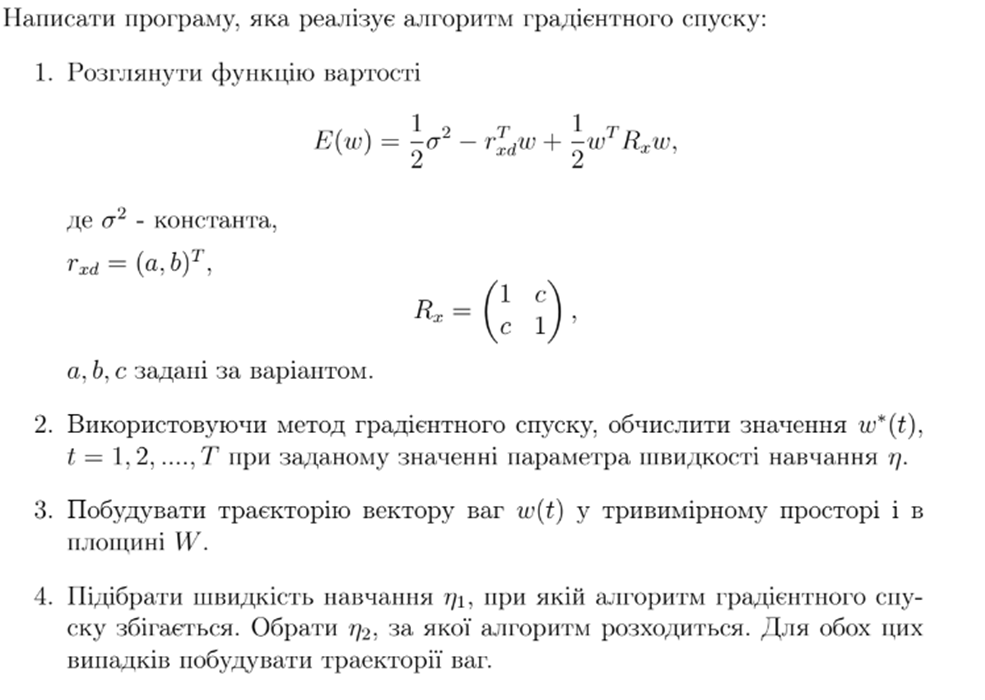

Параметри (варіант 2):  a = 0.5, b = 0.6, c = 0.7, η = 1.6

1.Задамо функцію вартості та візуалізуємо її:

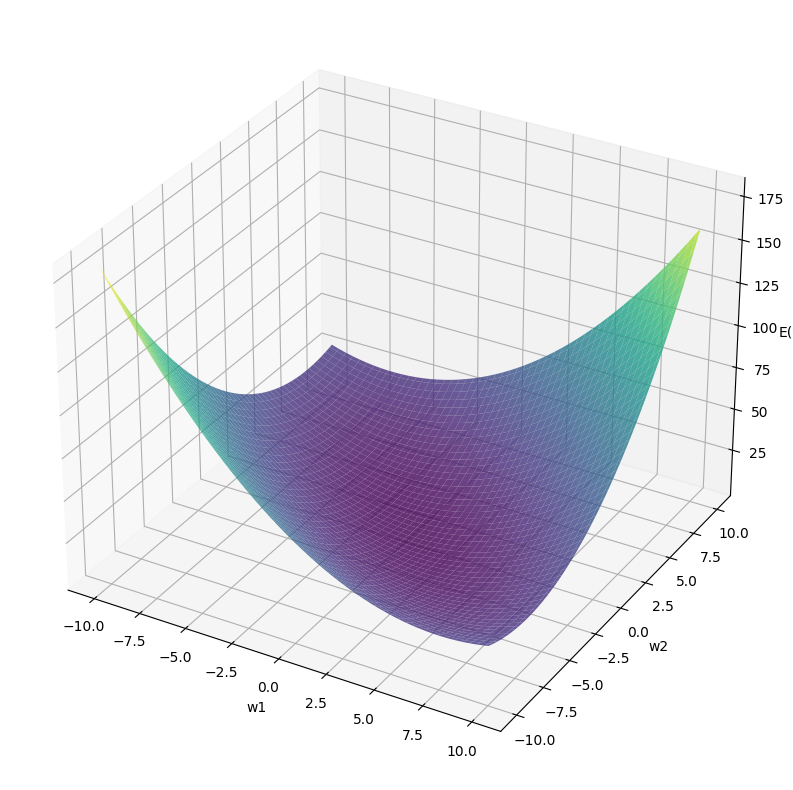

In [4]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML

#Задаємо функцію вартості
a = 0.5
b = 0.6
c = 0.7

sigma_squared = 2

Rx = np.array([[1, c], [c, 1]])
rxd = np.array([[a], [b]])

w1_values = np.linspace(-10, 10, 100)
w2_values = np.linspace(-10, 10, 100)

w1, w2 = np.meshgrid(w1_values, w2_values)

w = np.array([np.ravel(w1), np.ravel(w2)])

cost_values = []

for i in range(w.shape[1]):
    temp = w[:, i]
    cost_values.append(temp.T@Rx@temp/2 - rxd.T@temp + 1)
    
cost_values = np.array(cost_values).reshape(w1.shape)


fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(w1, w2, cost_values, cmap='viridis', alpha=0.8)
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('E(w)')

fig.tight_layout(rect=[0, 0, 1, 1])

plt.show()

2.а) Проаналізуємо умову та знайдемо оптимальний вектор ваг
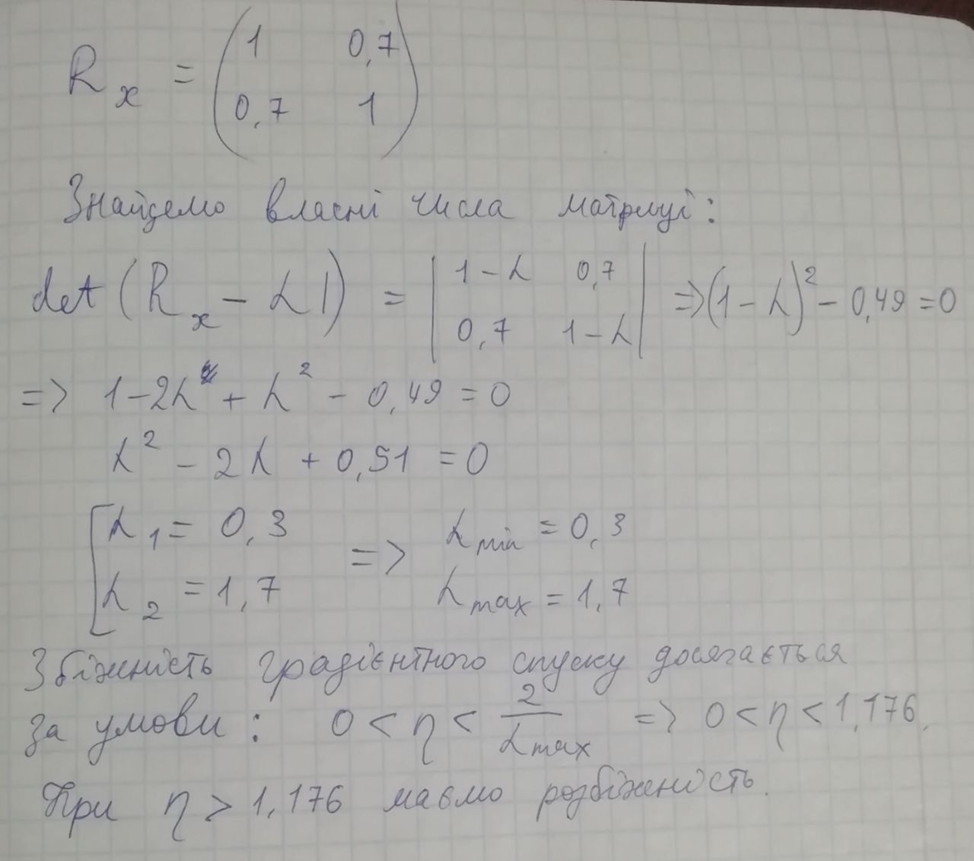
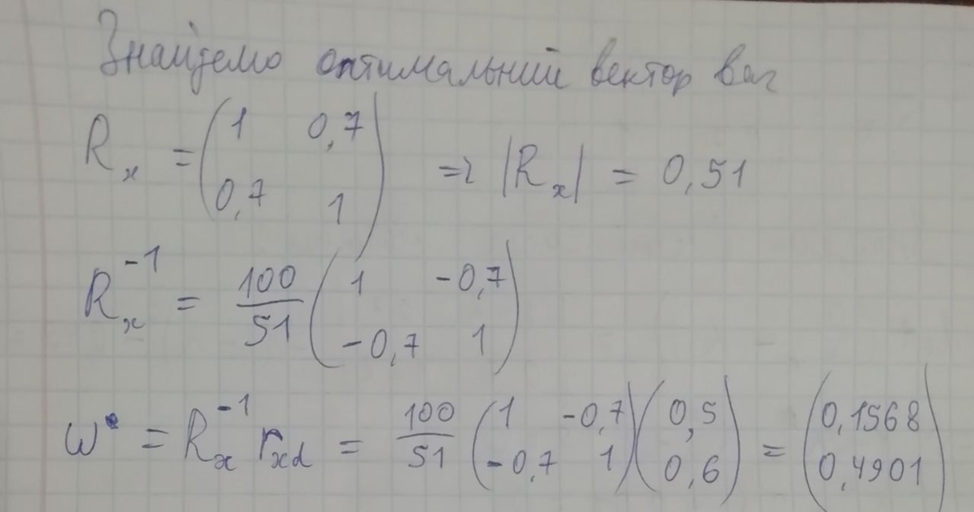

б)Побудуємо градієнтний спуск, використавши алгоритми простого GD та RMSprop

In [5]:
def gradient_descend(R, r, 
                     learning_rate_init=0.001,
                     learning_rate_type='const',  
                     iterations=100, 
                     optimizer='GD',
                     betta_1=0.9,
                     betta_2=0.999,
                     epsilon=1e-8,
                     alpha=0.9,
                     decay_rate=0.5,
                     k=10
                    ):

    loss_history = np.zeros(iterations)
    w_history = np.zeros((2, iterations))
    grad_history = np.zeros((2, iterations))
    
    w_i = np.array([[10.], [10.]])
    
    m_i = 0.
    v_i = 0.
    
    for i in range(iterations):
        E_i = w_i.T @ R @ w_i / 2 - r.T @ w_i + 1
        dw_i = R @ w_i - r
        
        loss_history[i] = E_i
        w_history[:, i] = w_i.reshape(2,)
        grad_history[:, i] = dw_i.reshape(2,)
        
        if optimizer == 'GD':
            w_i -= learning_rate_init * dw_i
        elif optimizer == 'RMSprop':
            v_i = betta_2 * v_i + (1 - betta_2) * dw_i * dw_i
            w_i -= learning_rate_init * dw_i / np.sqrt(v_i + epsilon)
        else:
            return 0
        
        if learning_rate_type == 'exp':
            learning_rate_init /= 1 + decay_rate * i
        elif learning_rate_type == 'scheduled':
            if i % k == 0:
                learning_rate_init /= 2
        elif learning_rate_type == 'const': 
            pass
    
    return w_i, loss_history, w_history, grad_history

3.Застосуємо градієнтний спуск та візуалізуємо результати:

C:\Users\HP\AppData\Local\Temp\ipykernel_9892\813497333.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  loss_history[i] = E_i


w:
[[0.15720522]
 [0.4898536 ]]
Final loss value: 0.8137255300190595


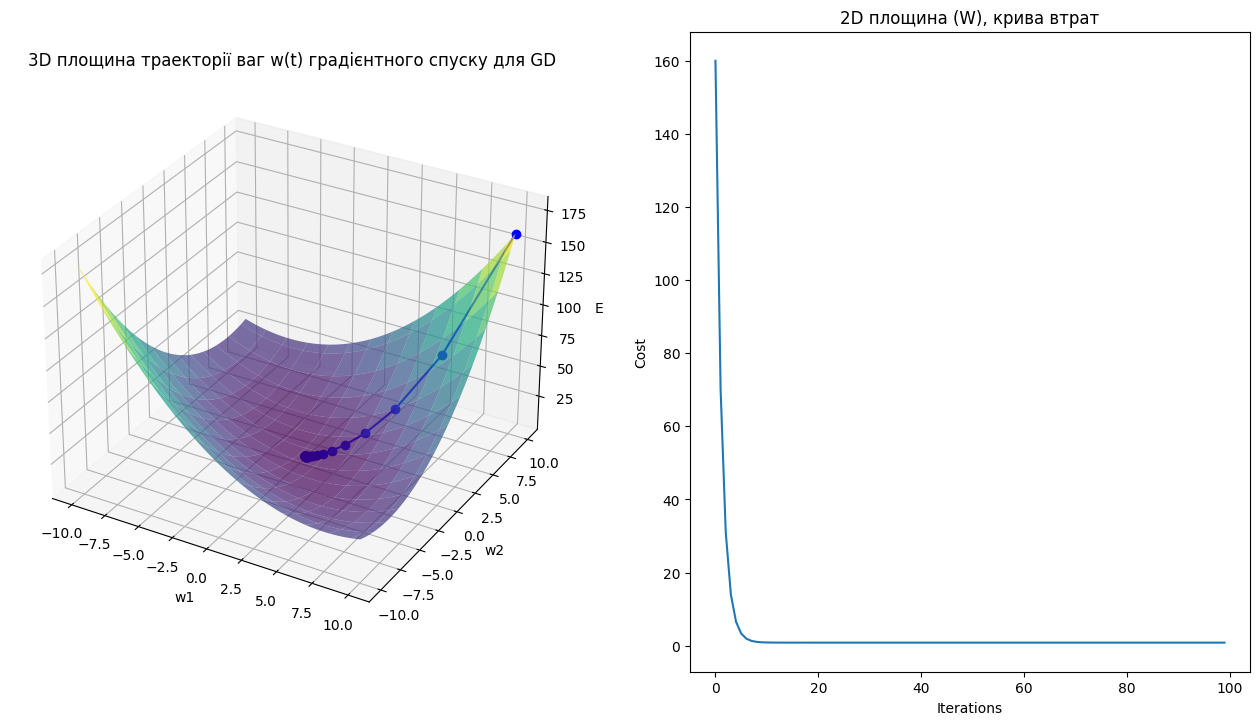

w:
[[0.15686438]
 [0.49019444]]
Final loss value: 0.8137254901971


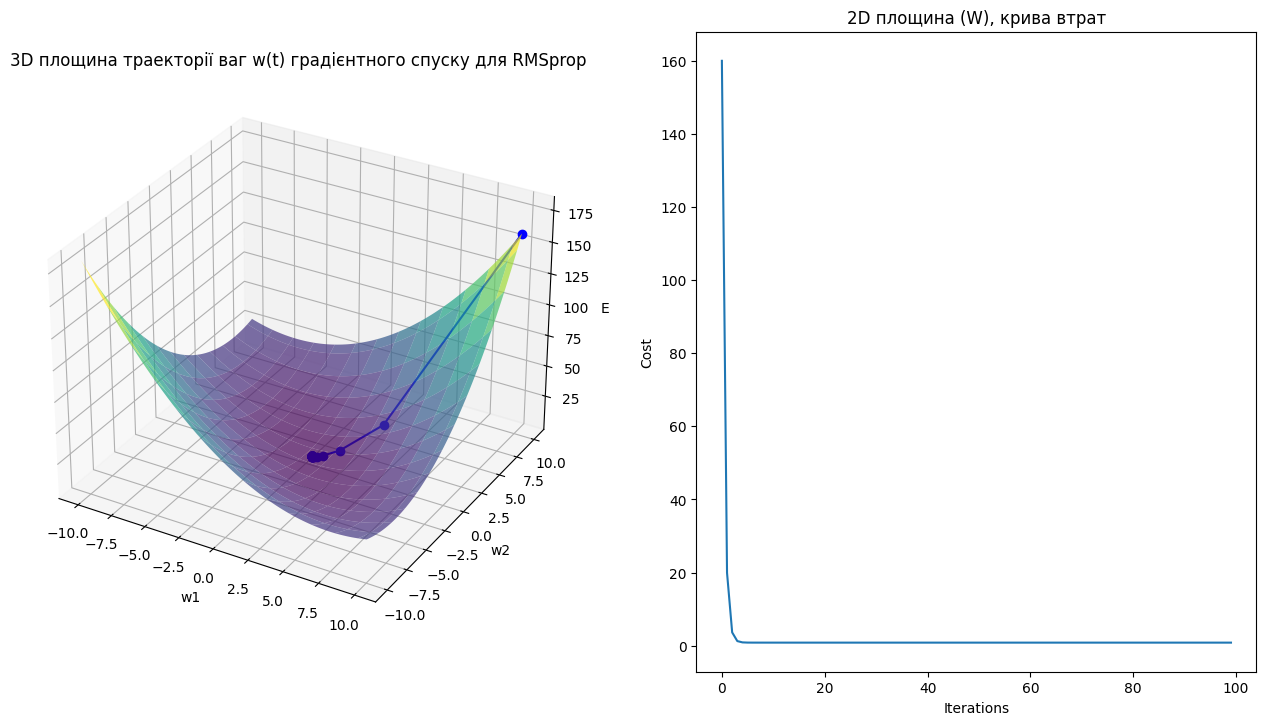

In [6]:
w0 = np.array([[0.1568], [0.4901]]) #Оптимальний вектор ваг
best_loss = w0.T@Rx@w0/2 - rxd.T@w0 + 1.

def plot_3d_surface(ax, w1, w2, cost_values):
    ax.plot_surface(w1, w2, cost_values, cmap='viridis', lw=0.5, rstride=8, cstride=8, alpha=0.7)

def plot_2d_loss_curve(ax, iterations, losses):
    ax.plot(np.arange(iterations), losses)
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')

def run_gradient_descent(optimizer, Rx, rxd, learning_rate_init=0.2, iterations=100):

    # Dynamically update HTML code with the current optimizer
    html_code = f"""
    <div id="1" style="margin: 0; padding: 5px; background-color: #d5eae9; color: #c27849;
                    font-family: 'New Times Roman', serif; font-size: 150%; text-align: center;
                    border-radius: 50px 50px; overflow: hidden; font-weight: 200;">
        <h4 style="margin: 0;">Градієнтний спуск для {optimizer}</h4>
    </div>
    """
    display(HTML(html_code))

    

    w_best, losses, ws, grads = gradient_descend(Rx, rxd, learning_rate_init=0.2, iterations=iterations, optimizer=optimizer)

    print("w:")
    print(w_best)
    print(f"Final loss value: {losses[-1]}")

    fig = plt.figure(figsize=(16, 8))
    
    ax1 = fig.add_subplot(121, projection='3d')
    plot_3d_surface(ax1, w1, w2, cost_values)
    ax1.plot(ws[0, :], ws[1, :], losses, zdir='z', label='GD', color='blue', marker='o')
    ax1.set(xlabel='w1', ylabel='w2', zlabel='E')
    ax1.set_title(f'3D площина траекторії ваг w(t) градієнтного спуску для {optimizer}')

    ax2 = fig.add_subplot(122)
    plot_2d_loss_curve(ax2, iterations, losses)
    ax2.set_title('2D площина (W), крива втрат')
    ax2.set_position([0.55, 0.1, 0.35, 0.8])  # Зміщення графіка вправо

    plt.show()

    return w_best, losses[-1]

# Початкові результати (default)
results = {
    'optimizers': ['sys'],
    'w1': [0.1],
    'w2': [0.1],
    'final_loss': [best_loss[0][0]]
}

# List of optimizers
optimizers_list = ['GD', 'RMSprop']

# Loop through optimizers
for optimizer in optimizers_list:
    w_best, final_loss = run_gradient_descent(optimizer, Rx, rxd, learning_rate_init=0.2, iterations=100)

    results['optimizers'].append(optimizer)
    results['w1'].append(w_best[0][0])
    results['w2'].append(w_best[1][0])
    results['final_loss'].append(final_loss)

4.a)Перевіримо значення η=0.9 (0<η<1.176) для збіжності алгоритму градієнтного спуску.

C:\Users\HP\AppData\Local\Temp\ipykernel_9892\813497333.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  loss_history[i] = E_i


w:
[[0.1640501 ]
 [0.48300873]]
Final loss value: 0.8137409957817279


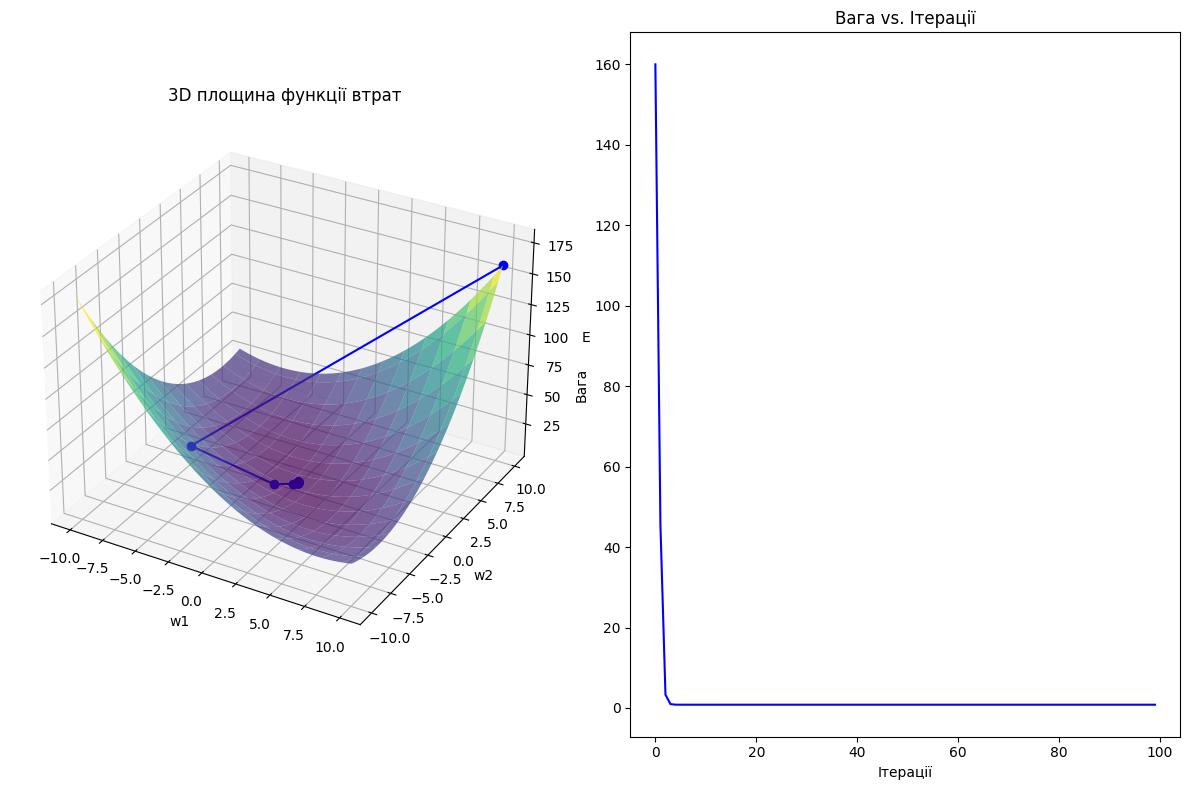

In [11]:
iters = 100
w_best, losses, ws, grads = gradient_descend(Rx, rxd, learning_rate_init=0.9, learning_rate_type='scheduled', iterations=iters, optimizer='GD')

print("w:")
print(w_best)
print(f"Final loss value: {losses[-1]}")

# 3D Plot
fig = plt.figure(figsize=(12, 8))
ax_3d = fig.add_subplot(121, projection='3d')
ax_3d.plot_surface(w1, w2, cost_values, cmap='viridis', lw=0.5, rstride=8, cstride=8, alpha=0.7)
ax_3d.plot(ws[0, :], ws[1, :], losses, zdir='z', label='GD', color='blue', marker='o')
ax_3d.set(xlabel='w1', ylabel='w2', zlabel='E', title='3D площина функції втрат')

# 2D Plot 
ax_2d = fig.add_subplot(122)
ax_2d.plot(range(iters), losses, label='Cost', color='blue')
ax_2d.set(xlabel='Ітерації', ylabel='Вага', title='Вага vs. Ітерації')

fig.tight_layout(rect=[0, 0, 1, 1])

plt.show()

б) Візьмемо значення η=1.3 (η>1.176) для розбіжності алгоритму градієнтного спуску

C:\Users\HP\AppData\Local\Temp\ipykernel_9892\813497333.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  loss_history[i] = E_i


w:
[[65.25650704]
 [65.58746257]]
Final loss value: 4921.430570098125


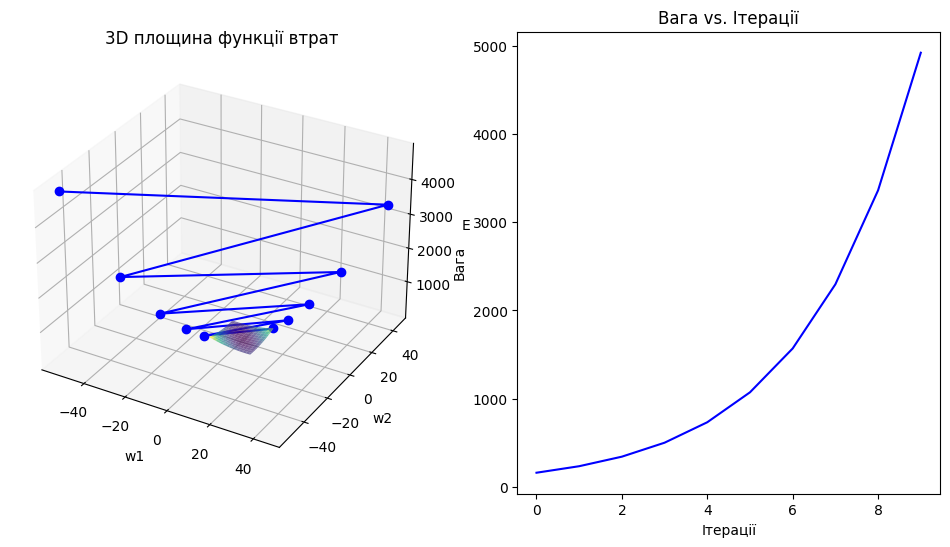

In [8]:
iters = 10
w_best, losses, ws, grads = gradient_descend(Rx, rxd, learning_rate_init=1.3, iterations=iters, optimizer='GD')
    
print("w:")
print(w_best)
print(f"Final loss value: {losses[-1]}")
    
# 3D Plot
fig = plt.figure(figsize=(12, 6))
ax_3d = fig.add_subplot(121, projection='3d')
ax_3d.plot_surface(w1, w2, cost_values, cmap='viridis', lw=0.5, rstride=8, cstride=8, alpha=0.7)
ax_3d.plot(ws[0, :], ws[1, :], losses, zdir='z', label='GD', color='blue', marker='o')
ax_3d.set(xlabel='w1', ylabel='w2', zlabel='E', title='3D площина функції втрат')

# 2D Plot 
ax_2d = fig.add_subplot(122)
ax_2d.plot(range(iters), losses, label='Cost', color='blue')
ax_2d.set(xlabel='Ітерації', ylabel='Вага', title='Вага vs. Ітерації')

plt.show()